In [9]:
import cv2
import matplotlib.pyplot as plt
from typing import List, Union
from pathlib import Path
import numpy as np
import os

In [8]:
BLACK_BACKGROUND = "/home/ana/University/Tamgi/data/objects_images/black"
WHITE_BACKGROUND = "/home/ana/University/Tamgi/data/objects_images/white"
SAVE_DIR = "/home/ana/University/Tamgi/data/object_images1"
SAVE_MASK_DIR = "/home/ana/University/Tamgi/data/objects_masks"

In [6]:
def mask_object_black_background(img_path: Union[str, Path], 
                                 mask_save_path: Union[str, Path] = None, 
                                 img_save_path: Union[str, Path] = None):
    fig = plt.figure(figsize=(12, 12))
    img = cv2.imread(img_path, 0)
    fig.add_subplot(1, 5, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Initial grayscale image")

    thresholded = np.where(img > 1, 255, 0).astype(np.uint8)
    _, thresh = cv2.threshold(thresholded, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    fig.add_subplot(1, 5, 2)
    plt.imshow(thresholded, cmap="gray")
    plt.title("Thresholded image")

    c = sorted(contours, key = cv2.contourArea, reverse=True)
    fig.add_subplot(1, 5, 3)
    plt.imshow(cv2.drawContours(img.copy(), c, 0, 255, 3), cmap="gray")
    plt.title("Image with max contour")

    mask = np.zeros(thresholded.shape)
    mask = cv2.drawContours(mask, c, 0, 1, -1)

    fig.add_subplot(1, 5, 4)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    if mask_save_path is not None:
        cv2.imwrite(mask_save_path, mask)


    fig.add_subplot(1, 5, 5)
    plt.imshow(cv2.bitwise_and(img, img, mask = mask[:, :, np.newaxis].astype(np.uint8)), cmap='gray')
    plt.title("Masked image")
    if img_save_path is not None:
        cv2.imwrite(img_save_path, img)

    plt.show()

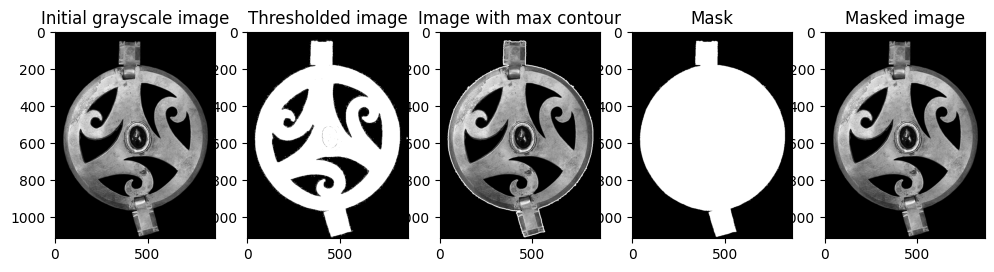

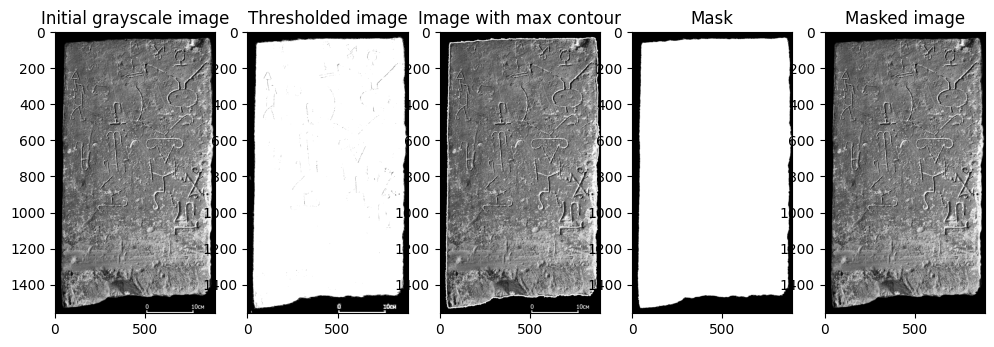

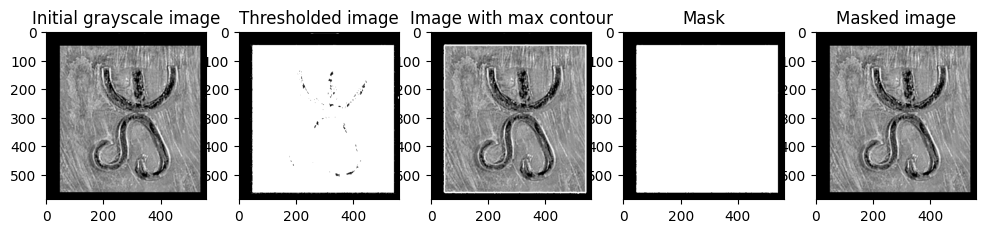

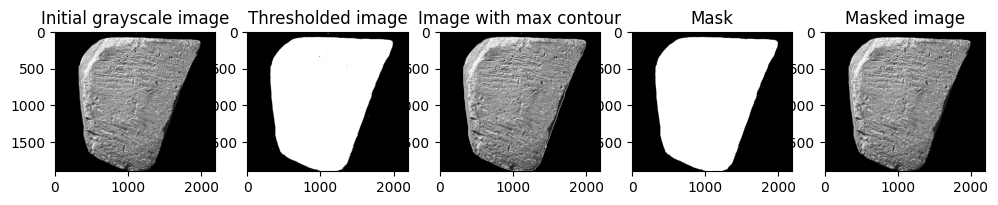

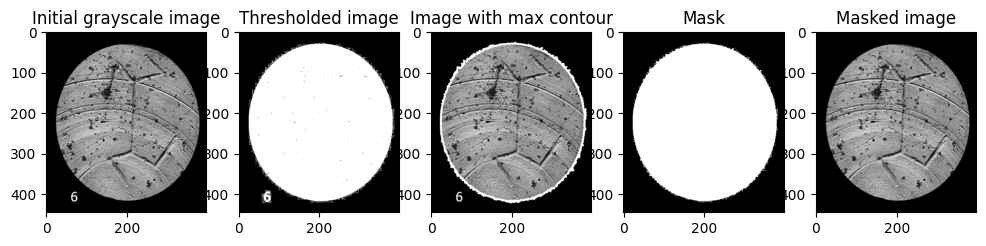

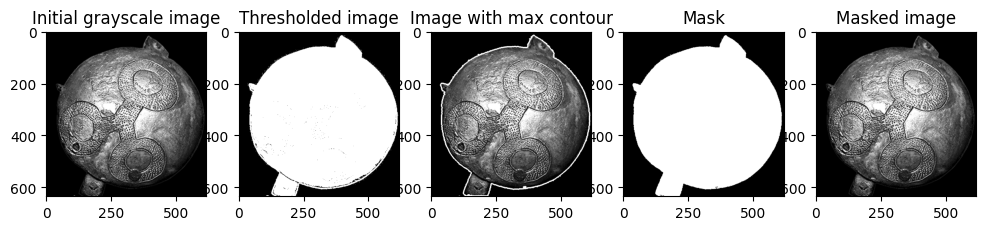

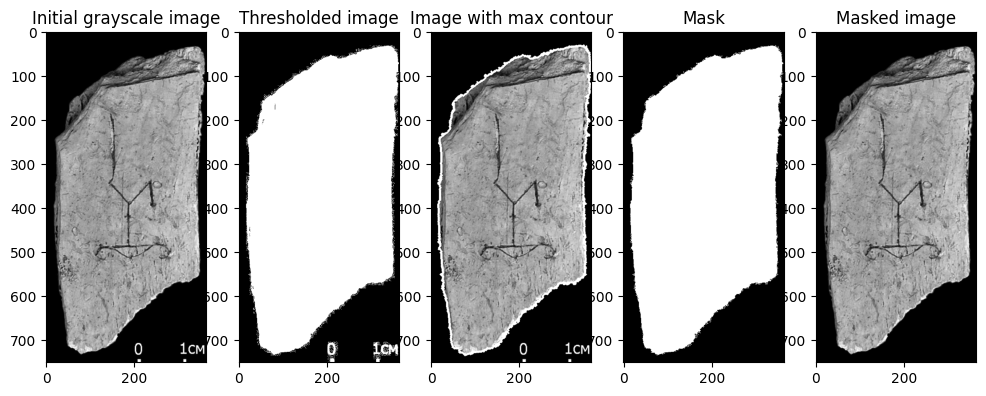

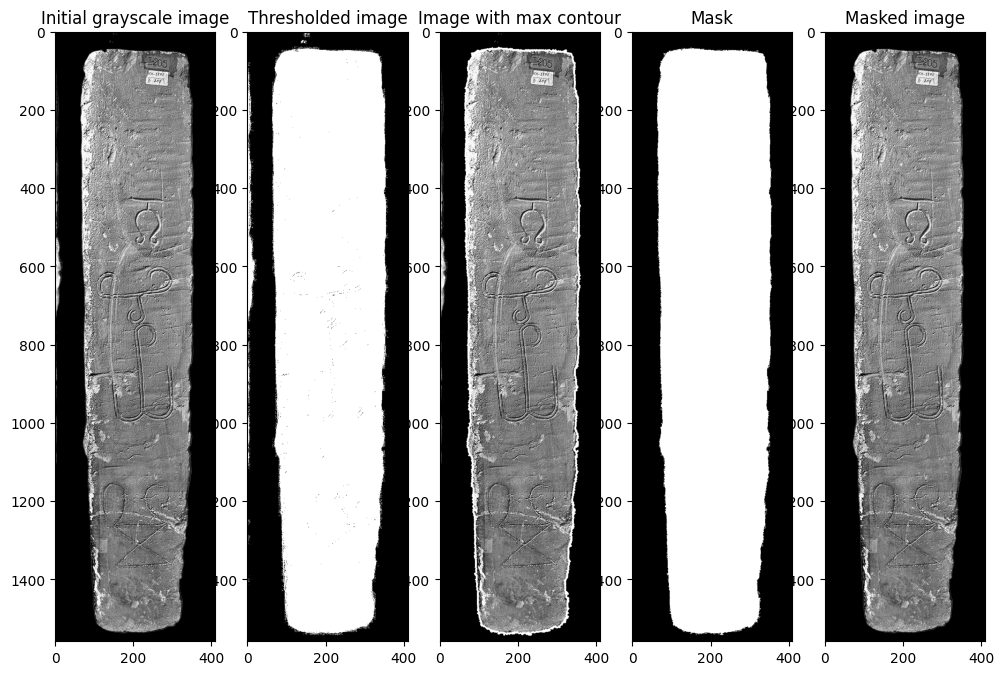

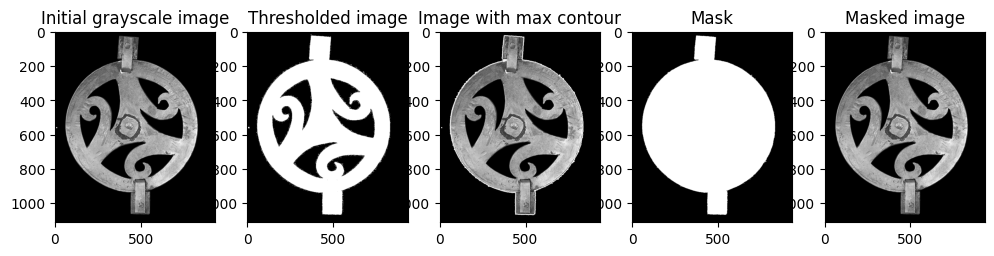

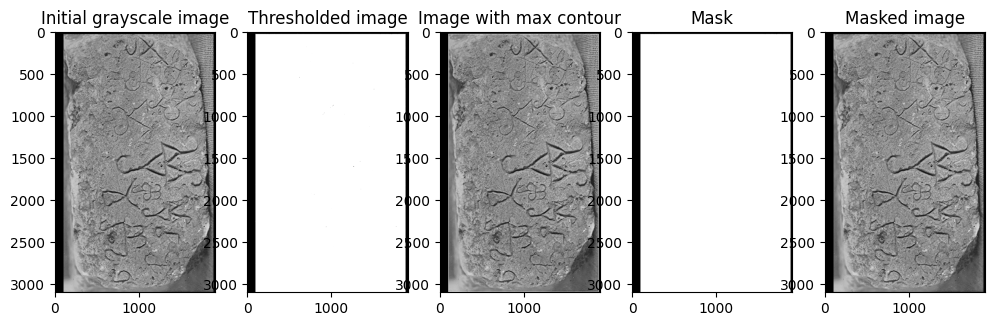

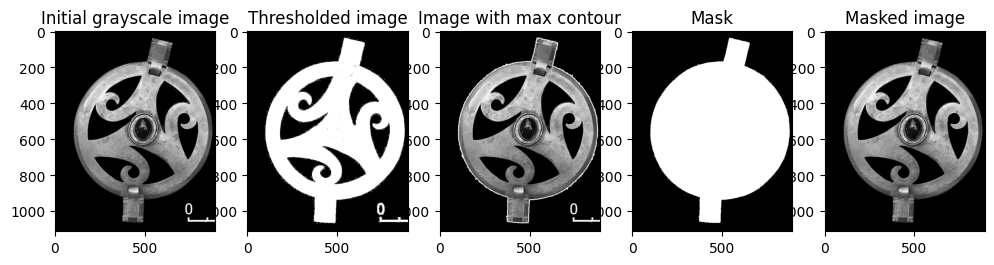

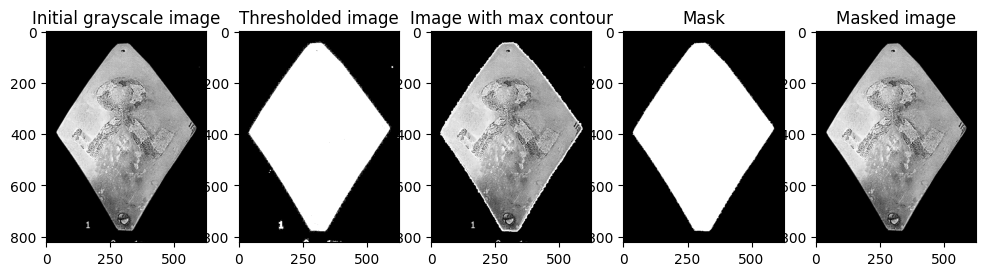

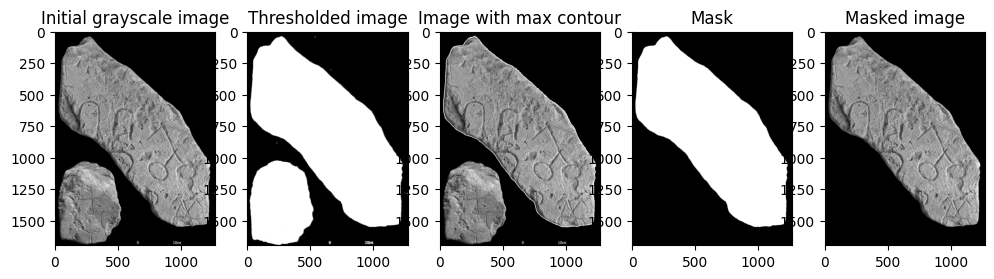

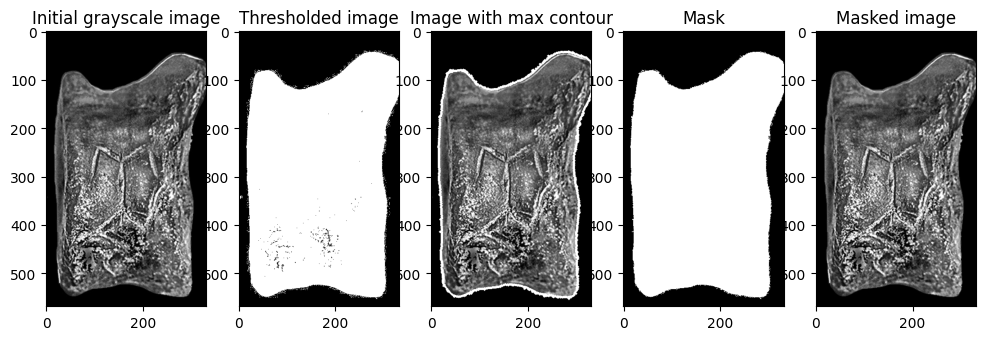

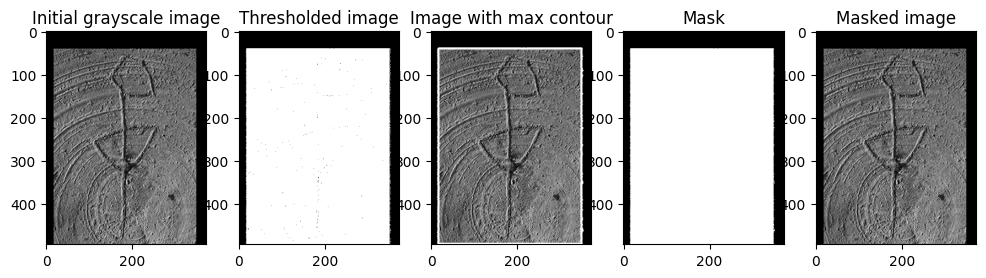

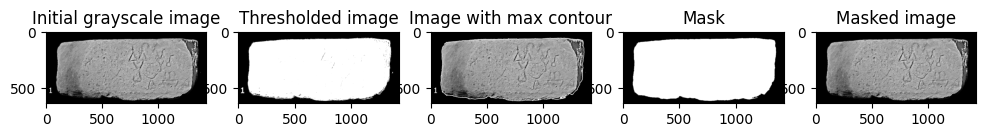

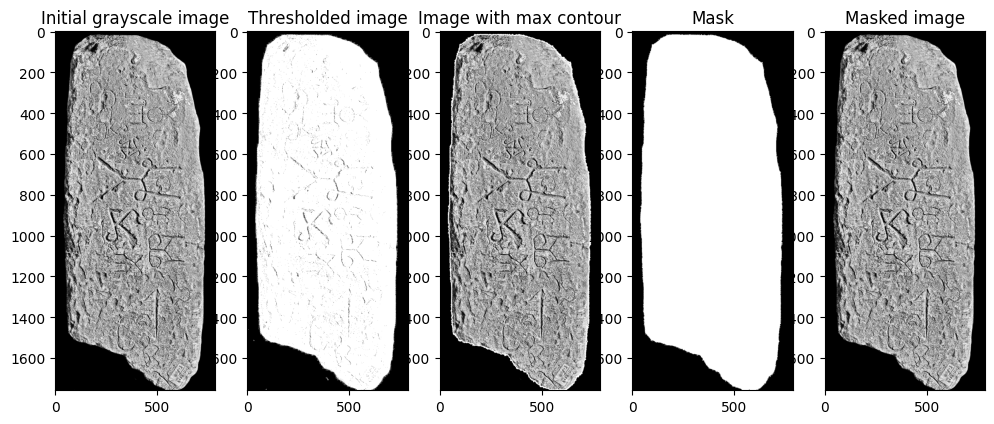

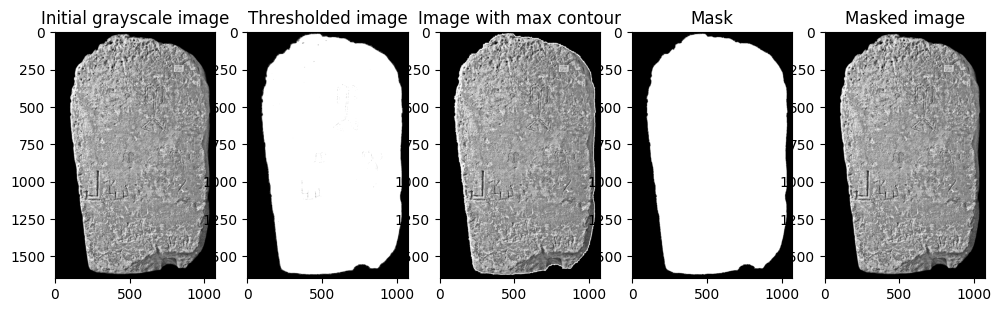

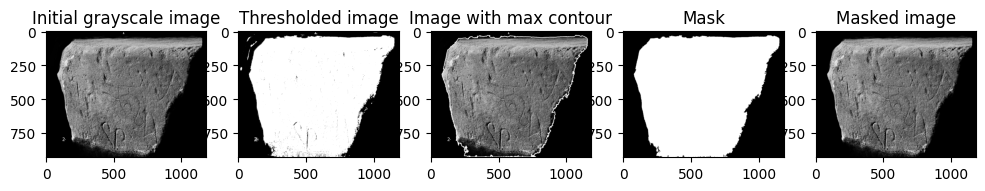

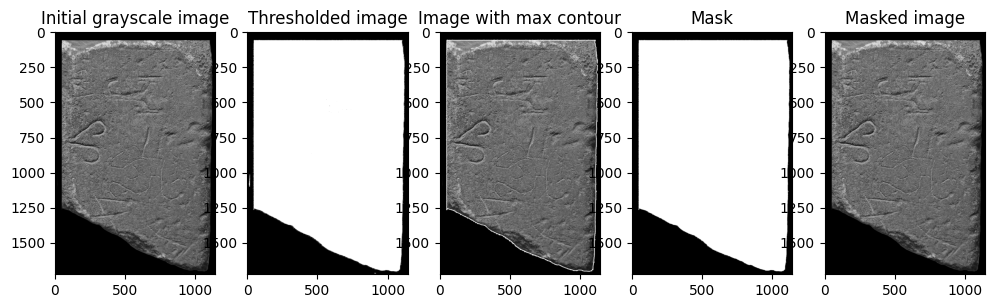

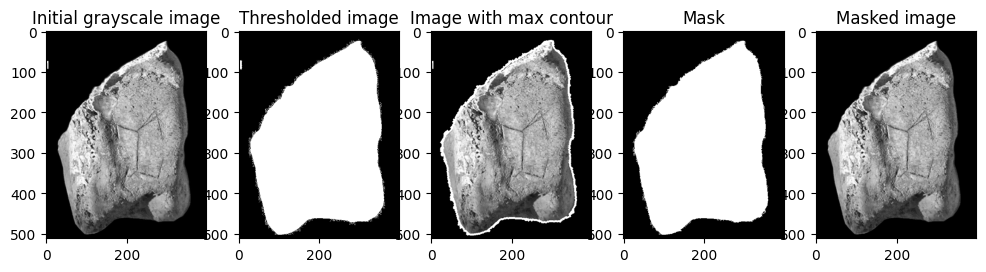

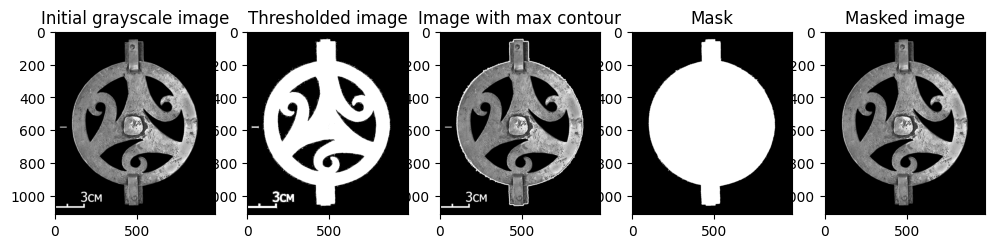

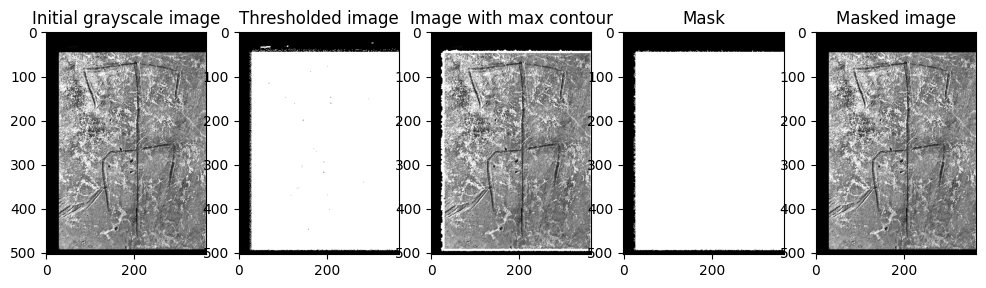

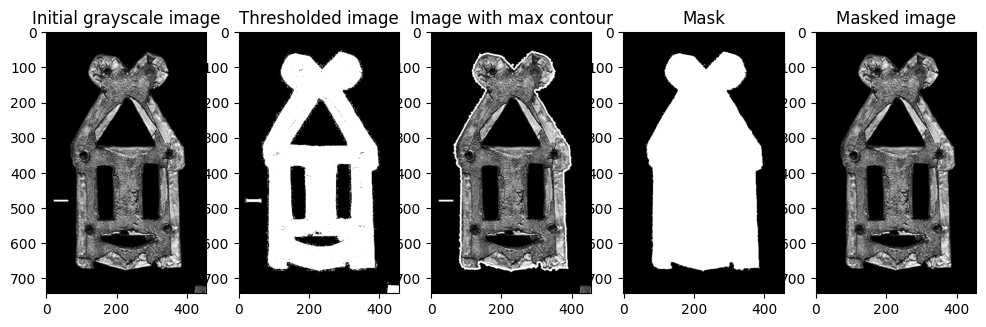

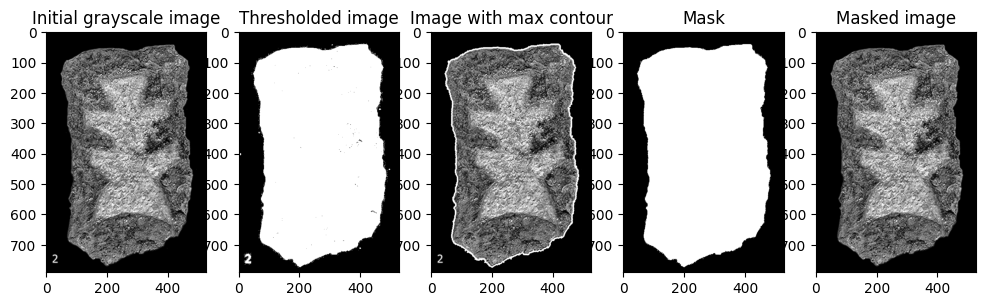

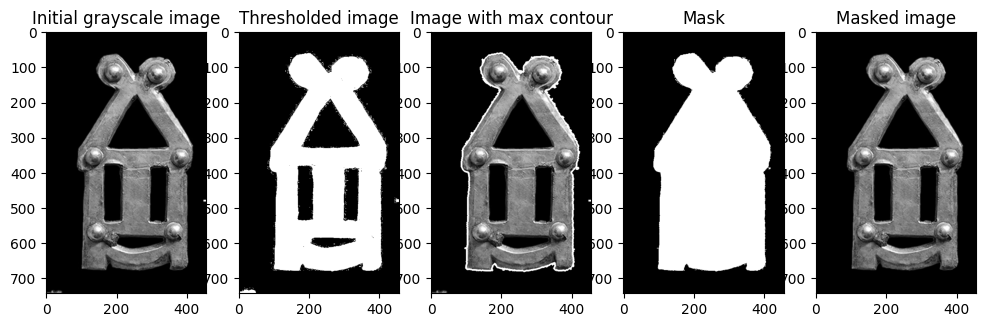

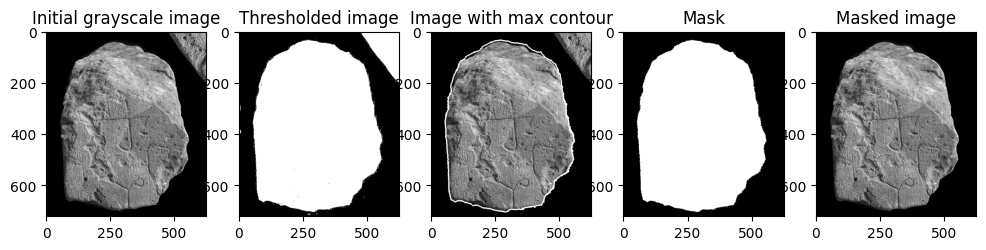

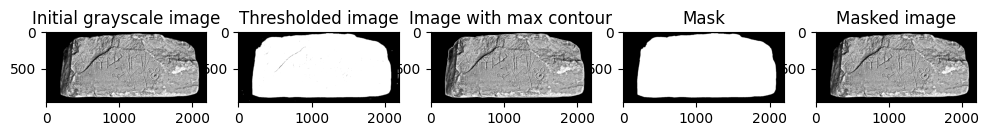

In [10]:
for path in os.listdir(BLACK_BACKGROUND):
    mask_object_black_background(os.path.join(BLACK_BACKGROUND, path), 
                             os.path.join(SAVE_MASK_DIR, path), 
                             os.path.join(SAVE_DIR, path))

In [15]:
def mask_object_white_background(img_path: Union[str, Path], 
                                 mask_save_path: Union[str, Path] = None, 
                                 img_save_path: Union[str, Path] = None):
    fig = plt.figure(figsize=(12, 12))
    img = cv2.imread(img_path, 0)
    fig.add_subplot(1, 5, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Initial grayscale image")

    thresholded = np.where(img < 255, 255, 0).astype(np.uint8)
    _, thresh = cv2.threshold(thresholded, 127, 255, 0)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    fig.add_subplot(1, 5, 2)
    plt.imshow(thresholded, cmap="gray")
    plt.title("Thresholded image")

    c = sorted(contours, key = cv2.contourArea, reverse=True)
    fig.add_subplot(1, 5, 3)
    plt.imshow(cv2.drawContours(img.copy(), c, 0, 255, 1), cmap="gray")
    plt.title("Image with max contour")

    mask = np.zeros(thresholded.shape)
    mask = cv2.drawContours(mask, c, 0, 1, -1)

    fig.add_subplot(1, 5, 4)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    if mask_save_path is not None:
        cv2.imwrite(mask_save_path, mask)


    fig.add_subplot(1, 5, 5)
    plt.imshow(cv2.bitwise_and(img, img, mask = mask[:, :, np.newaxis].astype(np.uint8)), cmap='gray')
    plt.title("Masked image")
    if img_save_path is not None:
        cv2.imwrite(img_save_path, img)

    plt.show()

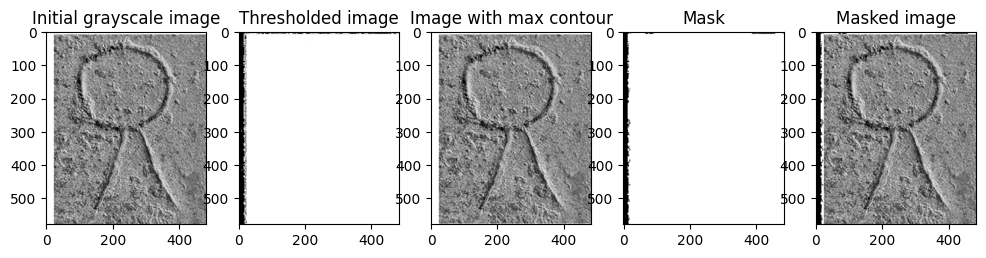

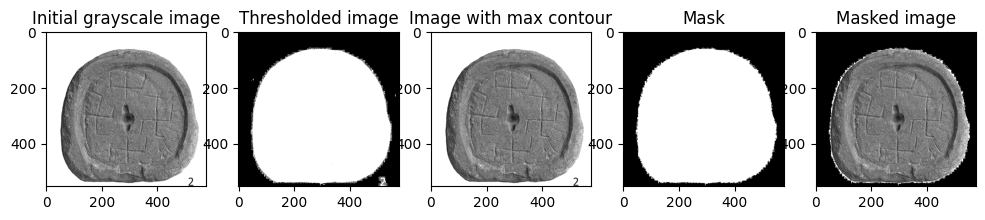

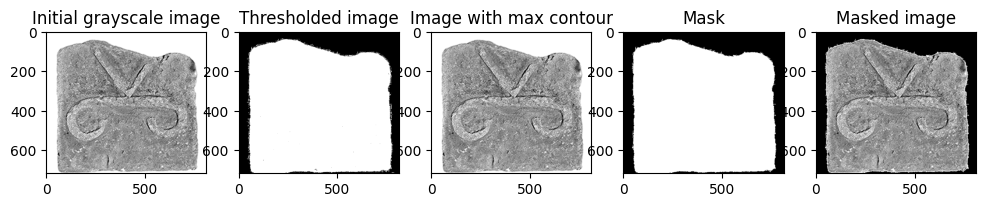

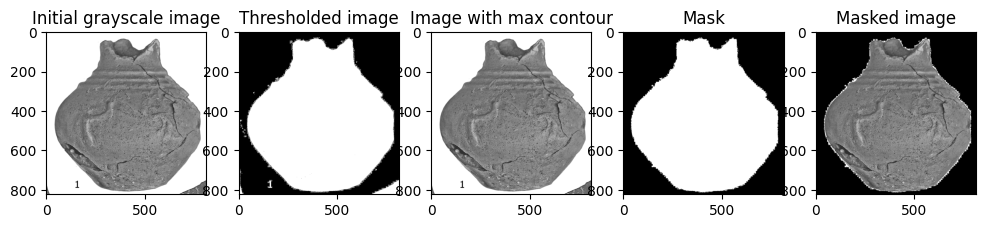

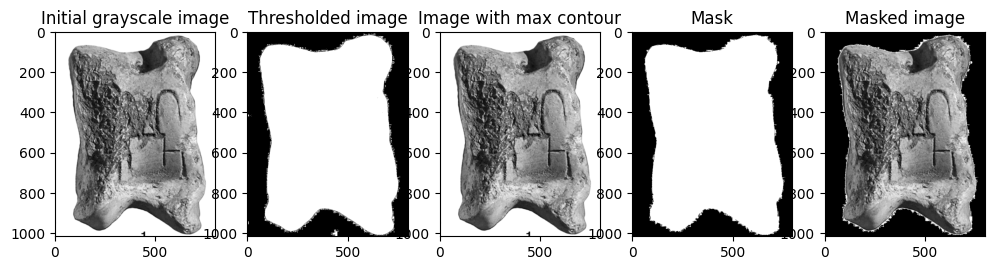

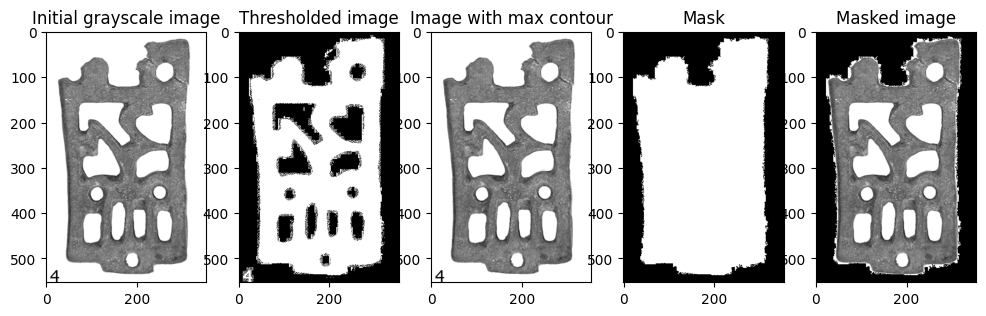

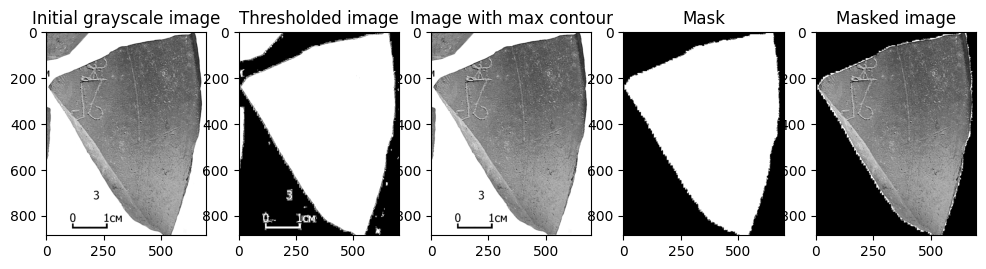

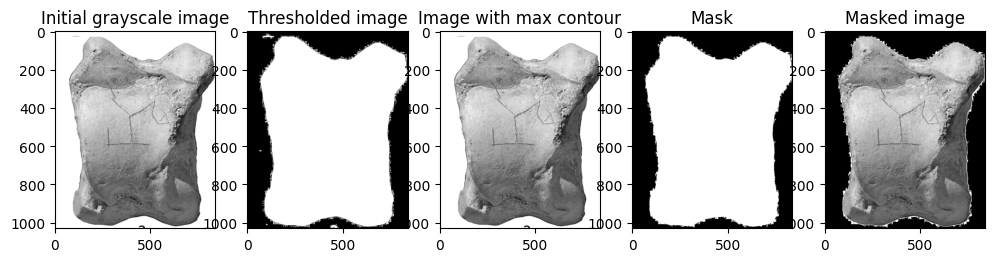

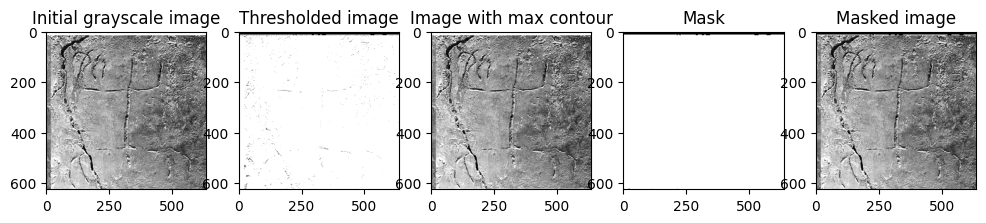

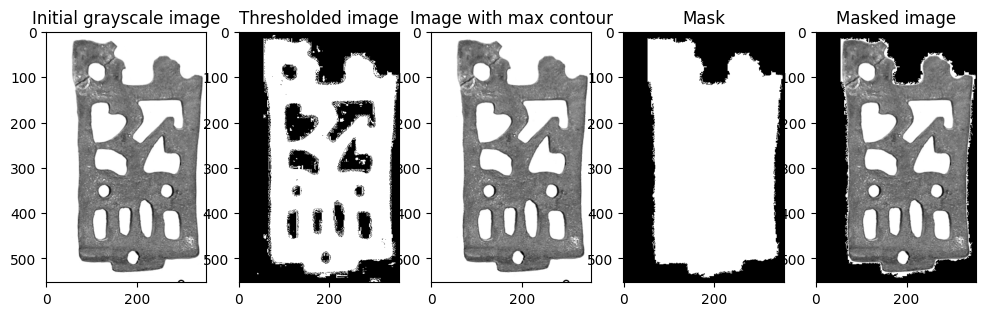

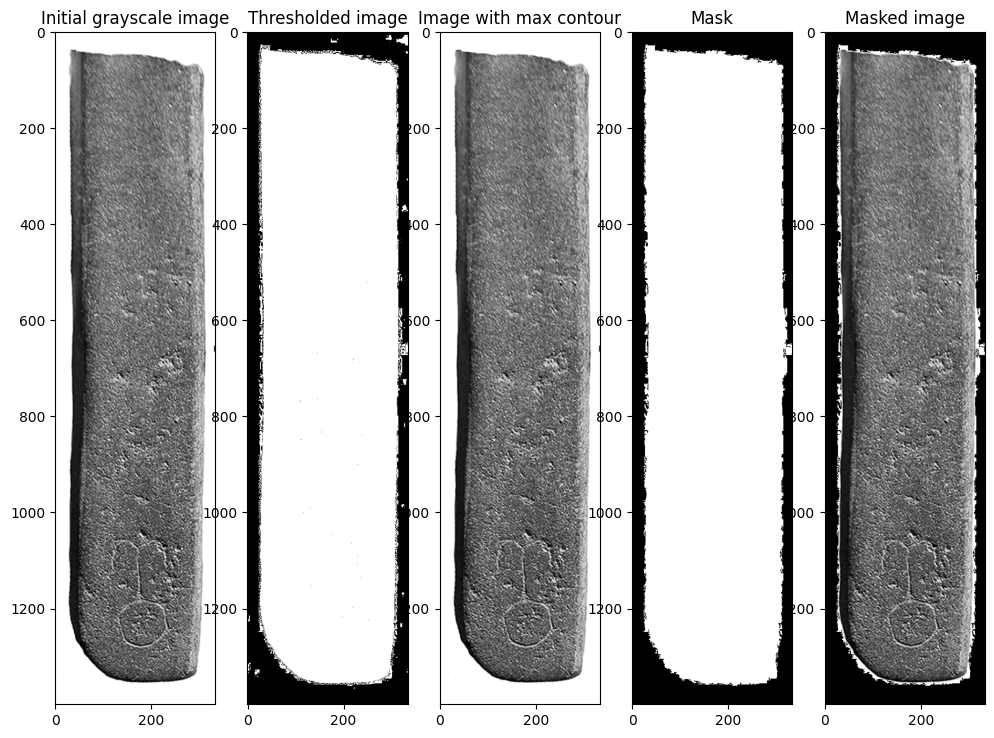

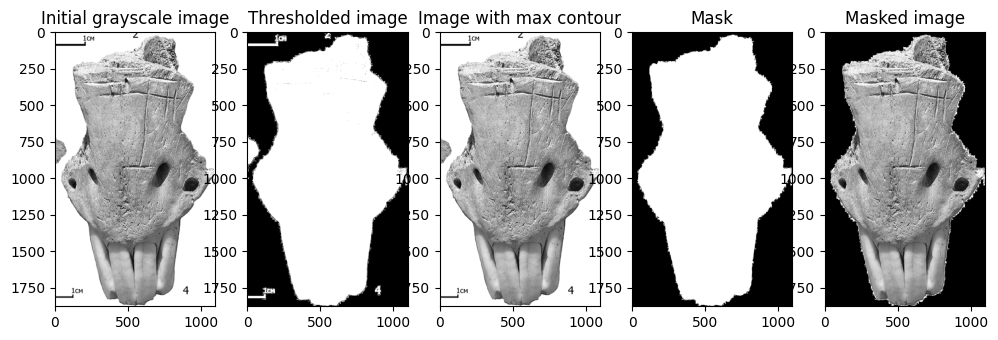

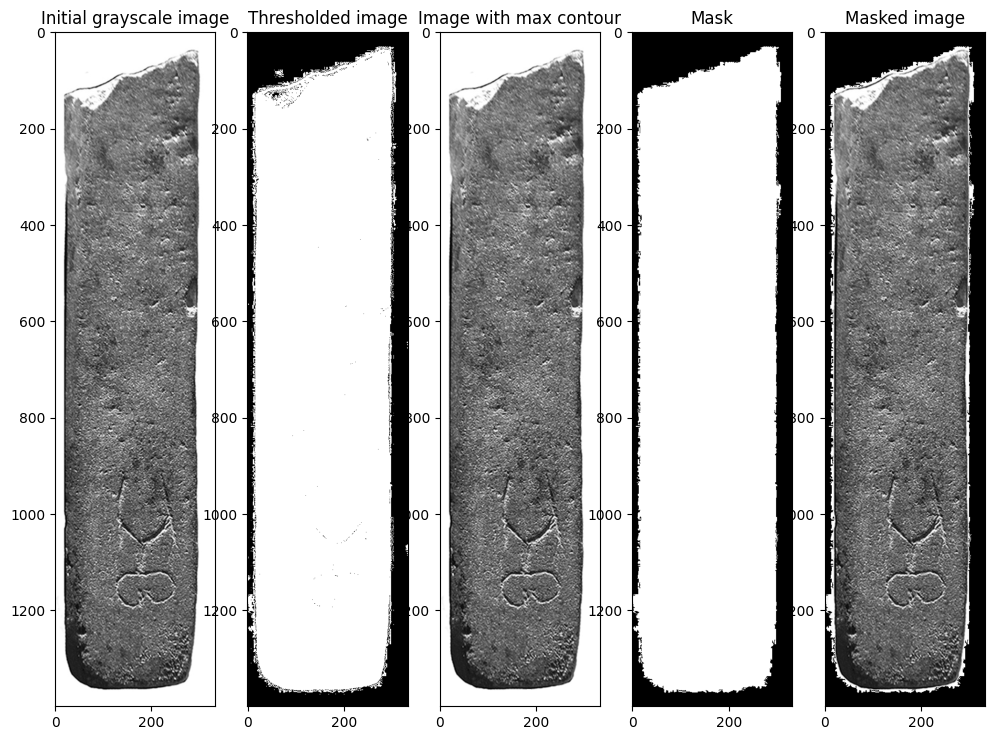

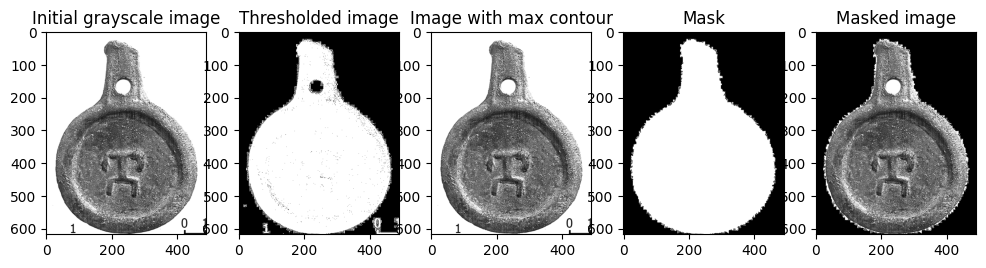

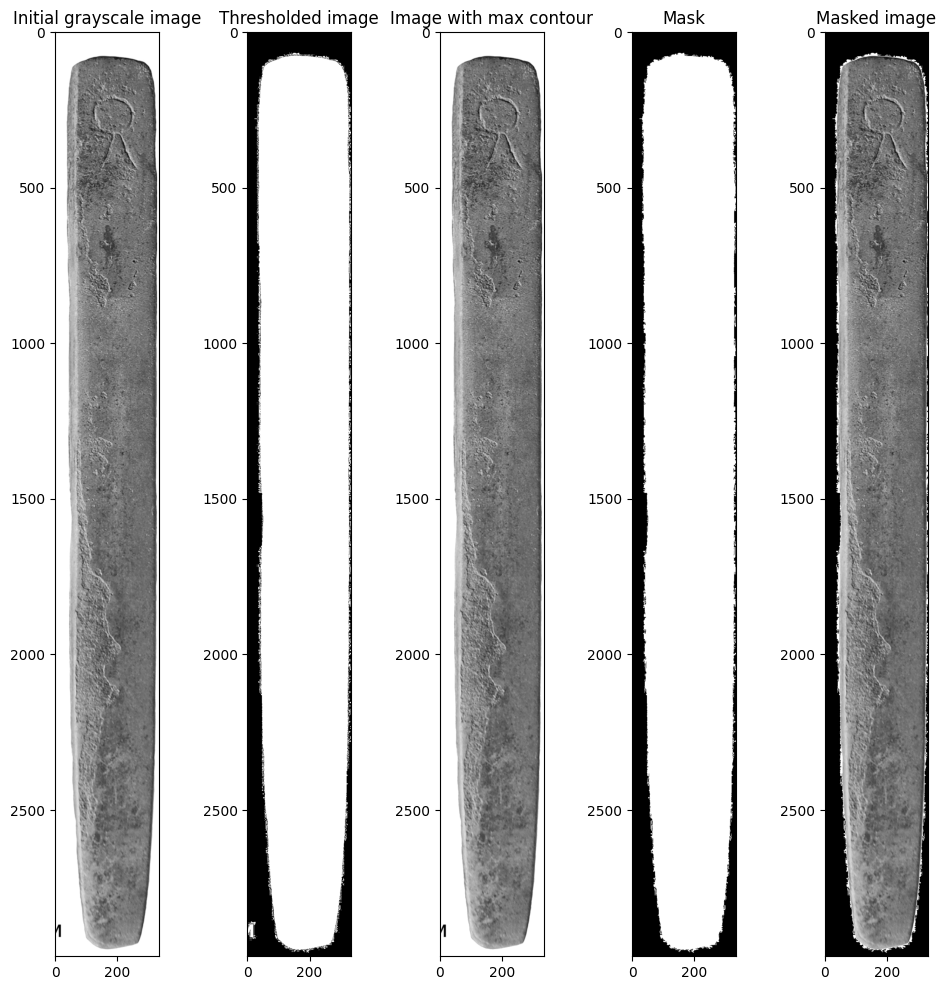

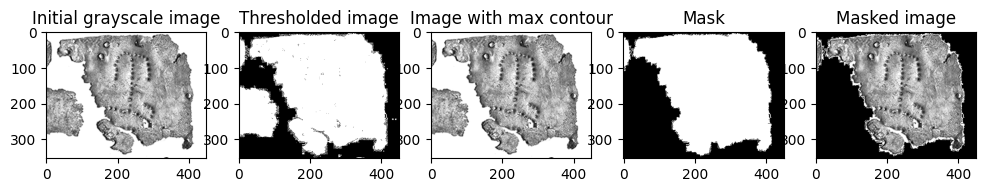

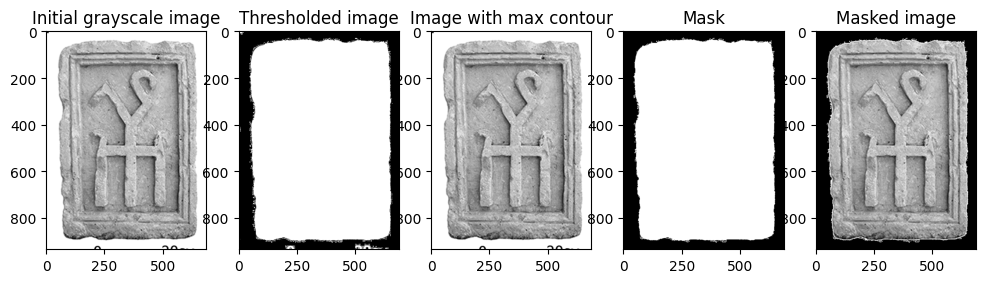

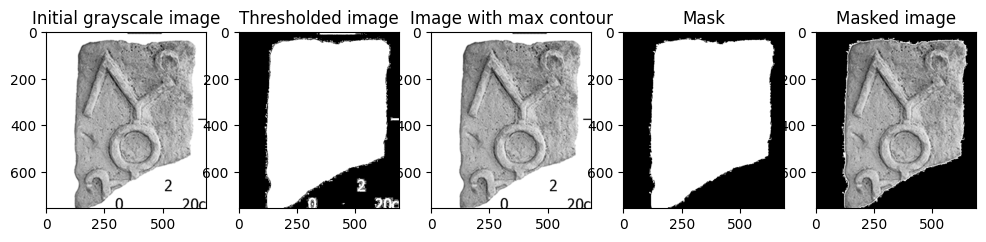

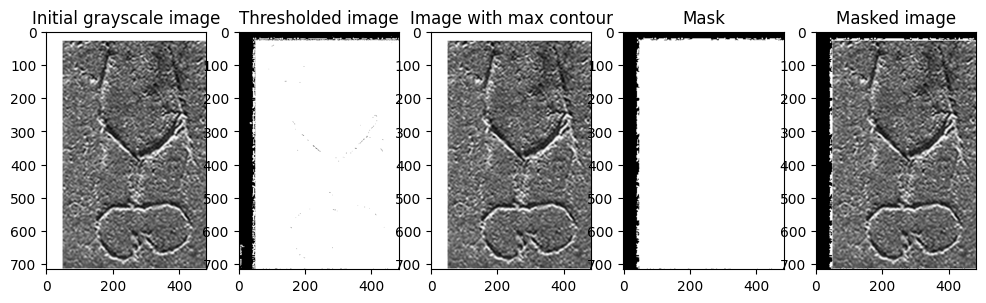

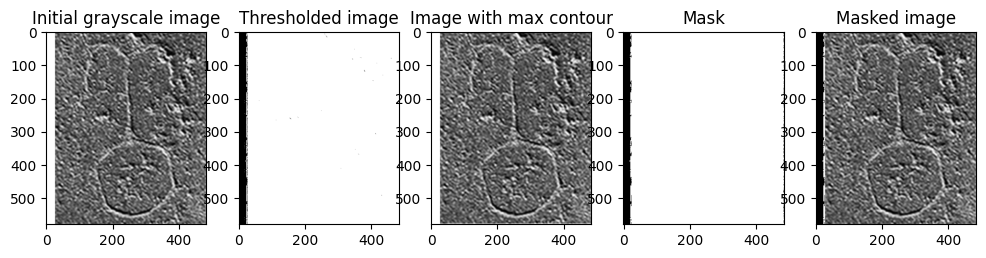

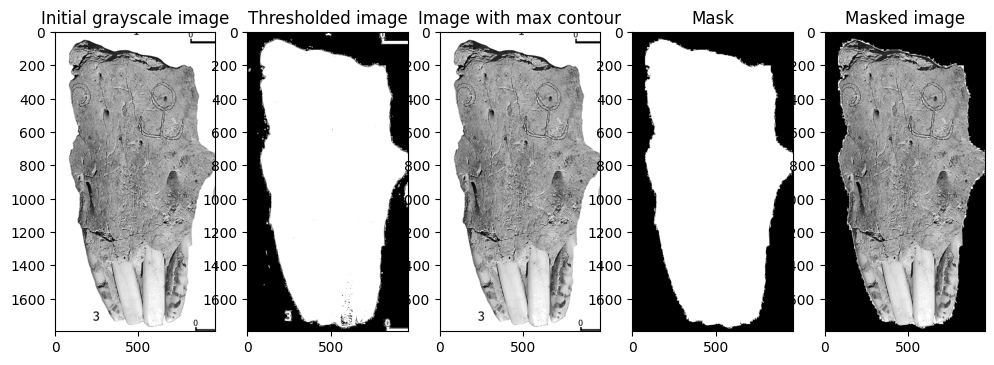

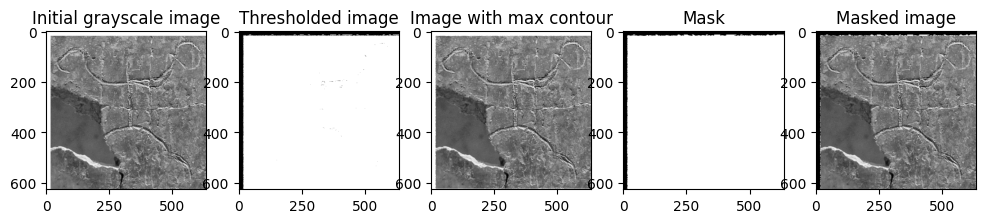

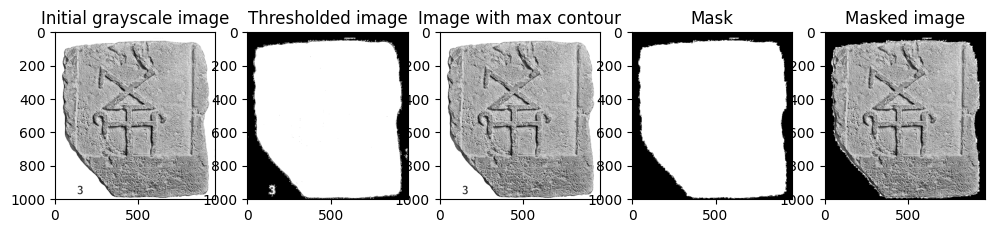

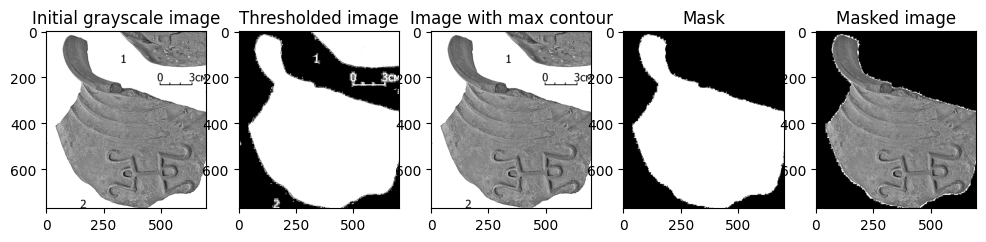

In [17]:
for path in os.listdir(WHITE_BACKGROUND):
    mask_object_white_background(os.path.join(WHITE_BACKGROUND, path), 
                             os.path.join(SAVE_MASK_DIR, path), 
                             os.path.join(SAVE_DIR, path))